In [5]:
import requests
from bs4 import BeautifulSoup
import numpy as np


link = 'https://www.youtube.com/@GeeksforGeeksVideos/videos'

Requesting a link and directly process it by using BeautifulSoup.

The first question that comes to our mind before using web driver is 
"What is the need for webdrivers" when we can simply scrape data using requests?
We used to import requests and send a request to the website using 
- reuests.get()
Now we usually create a soup out of this request using another important library
called "BeautifulSoup".When we print this Soup, we get daata from the website in 
its original html formate and after that we have to convert it into text formate
by using - soup.text
But all website is not permitted the scrapping, website are scrapable,some are hard
scrap and some are easy.So we have to use webdriver for scrapping.


In [6]:
res = requests.get(link)
soup = BeautifulSoup(res.text,'html.parser')
soup.text

'AboutPressCopyrightContact usCreatorAdvertiseDevelopersTermsPrivacyPolicy & SafetyHow YouTube worksTest new features© 2023 Google LLCGeeksforGeeks - YouTube'

# Setting-up Selenium

Selenium Web driver 
!pip install selenium

Selenium is an open-source framework designed for testing. The selenium web driveris just one part od the overall selenium library.It allows us to run our scripts in an automated process on the web driver, which helps us to decrease the time to scrape data.
Selenium web driver basically work in 3 steps:
First, the json wire protocol converts the test commands into a HTTP request.
The Driver , which is already present in each browser, is initialiesd before any script is executed.
Once everything is ready, the driver starts to send requests to the browser.


!pip install chromedriver_binary

# Data Collection

Getting started with Data Gathering and Investigation.

In [7]:
from selenium import webdriver
import chromedriver_binary

In [184]:
browser = webdriver.Chrome()
browser.get('https://www.youtube.com/@GeeksforGeeksVideos/videos')

In [185]:
soup = BeautifulSoup(browser.page_source,'html.parser')
sp = soup.find_all('ytd-rich-item-renderer')
sp[0].text

'\n\n\n  3:47\nNow playing\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n3:47\n\n  3:47\nNow playing\n\n\n\n\n\n\n\n\n\n\n\nAll Your Queries Answered | DSA to Development Program | GeeksforGeeks\n\n\n\n\n\n\n\n\n\n\n\n  Verified\n\n\n\n•\n\n\n\n\n•\n690 views\n1 day ago\n\n\n\n\n\n\n\n'

In [186]:
sp[0].find('a',class_ = 'yt-simple-endpoint focus-on-expand style-scope ytd-rich-grid-media')

<a aria-label="All Your Queries Answered | DSA to Development Program | GeeksforGeeks by GeeksforGeeks 1 day ago 3 minutes, 47 seconds 690 views" class="yt-simple-endpoint focus-on-expand style-scope ytd-rich-grid-media" href="/watch?v=kHBzDvj3D2U" id="video-title-link" title="All Your Queries Answered | DSA to Development Program | GeeksforGeeks"><yt-formatted-string aria-label="All Your Queries Answered | DSA to Development Program | GeeksforGeeks by GeeksforGeeks 1 day ago 3 minutes, 47 seconds 690 views" class="style-scope ytd-rich-grid-media" id="video-title">All Your Queries Answered | DSA to Development Program | GeeksforGeeks</yt-formatted-string></a>

In [187]:
Views = sp[0].find('span',class_="style-scope ytd-thumbnail-overlay-time-status-renderer").text.replace('\n','').replace(' ','')
Views

'3:47'

In [12]:
title  = sp[0].find('a', class_ = 'yt-simple-endpoint focus-on-expand style-scope ytd-rich-grid-media').text
title

'All Your Queries Answered | DSA to Development Program | GeeksforGeeks'

In [13]:
video_link = sp[0].find('a', class_ = 'yt-simple-endpoint focus-on-expand style-scope ytd-rich-grid-media').get('href')
link = 'https://www.youtube.com' + video_link 

In [283]:
views = sp[0].find_all('span', class_ ="inline-metadata-item style-scope ytd-video-meta-block")[-2].text
views.replace('views','').replace(' ','')

'579'

In [14]:
sp[0].find_all('span')

[<span aria-label="3 minutes, 47 seconds" class="style-scope ytd-thumbnail-overlay-time-status-renderer" id="text">
   3:47
 </span>,
 <span class="style-scope ytd-thumbnail-overlay-now-playing-renderer" id="overlay-text">Now playing</span>,
 <span aria-label="3 minutes, 47 seconds" class="style-scope ytd-thumbnail-overlay-time-status-renderer" id="text">
   3:47
 </span>,
 <span class="style-scope ytd-thumbnail-overlay-now-playing-renderer" id="overlay-text">Now playing</span>,
 <span class="style-scope ytd-badge-supported-renderer"></span>,
 <span class="inline-metadata-item style-scope ytd-video-meta-block">685 views</span>,
 <span class="inline-metadata-item style-scope ytd-video-meta-block">1 day ago</span>]

In [15]:
date_time = sp[0].find_all('span', class_ ="inline-metadata-item style-scope ytd-video-meta-block")[-1].text
date_time

'1 day ago'

In [16]:
for sp in soup.find_all('ytd-rich-item-renderer'):
    print(sp.find('img').get('src').split('?')[0])
    break

https://i.ytimg.com/vi/kHBzDvj3D2U/hqdefault.jpg


In [17]:
sp.find('span',class_ ='style-scope ytd-thumbnail-overlay-time-status-renderer').text.replace('\n','').replace(' ','')

'3:47'

In [20]:
soup = BeautifulSoup(browser.page_source,'html.parser')

In [153]:
data = []

for sp in soup.find_all('ytd-rich-item-renderer'):
    
    Title              = sp.find('a', class_ = 'yt-simple-endpoint focus-on-expand style-scope ytd-rich-grid-media').text
    VideoLink         = sp.find('a', class_ = 'yt-simple-endpoint focus-on-expand style-scope ytd-rich-grid-media').get('href')
    Link = 'https://www.youtube.com' + video_link 
    try:
        Views          = sp.find_all('span', class_ ="inline-metadata-item style-scope ytd-video-meta-block")[-2].text.replace('views','').replace(' ','')
    except:
        Views          = np.nan
    try:
        Date_Time      = sp.find_all('span', class_ ="inline-metadata-item style-scope ytd-video-meta-block")[-1].text
    except:
        Date_Time      = np.nan
    try:
        ThumbnailLink = sp.find('img').get('src').split('?')[0]
    except:
        ThumbnailLink = np.nan
    
    LengthOfVideo =sp.find('span',class_="style-scope ytd-thumbnail-overlay-time-status-renderer").text.replace('\n','').replace(' ','')
        
    data.append([Title,Views,Date_Time,Link,LengthOfVideo])
    
    
    

In [148]:
data

[['All Your Queries Answered | DSA to Development Program | GeeksforGeeks',
  '685',
  '1 day ago',
  'https://www.youtube.com/watch?v=PLdt7UobcoY',
  '3:47'],
 ['10 TIPS and TRICKS to Crack Internships and Placements | GeeksforGeeks',
  '682',
  '6 days ago',
  'https://www.youtube.com/watch?v=PLdt7UobcoY',
  '9:53'],
 ['Complete School Guide for CBSE | Free Resources For School Students | GeeksforGeeks',
  '511',
  '7 days ago',
  'https://www.youtube.com/watch?v=PLdt7UobcoY',
  '0:56'],
 ['Master System Design | GeeksforGeeks',
  '7.2K',
  '11 days ago',
  'https://www.youtube.com/watch?v=PLdt7UobcoY',
  '0:46'],
 ['Unraveling the Geek-a-thon: The What, How, and Why | Geek-A-Thon | GeeksforGeeks',
  '440',
  '11 days ago',
  'https://www.youtube.com/watch?v=PLdt7UobcoY',
  '45:44'],
 ['Data Analysis Masterclass | Geek-A-Thon | GeeksforGeeks',
  '596',
  '12 days ago',
  'https://www.youtube.com/watch?v=PLdt7UobcoY',
  '1:29:21'],
 ['GeeksforGeeks Offline Classroom Program | Now Open

In [149]:
len(data)

90

In [150]:
data[87]

['GeeksforGeeks Goes to Delhi Technological University | GfG X DTU',
 '1.7K',
 '10 months ago',
 'https://www.youtube.com/watch?v=PLdt7UobcoY',
 '1:24']

In [151]:
import pandas as pd

In [154]:
df = pd.DataFrame(data,columns = ['Title','Views','Date_Time','Link','LengthOfVideo'])


In [155]:
df

,Title,Views,Date_Time,Link,LengthOfVideo
0,All Your Queries Answered | DSA to Development...,685,1 day ago,https://www.youtube.com/watch?v=PLdt7UobcoY,3:47
1,10 TIPS and TRICKS to Crack Internships and Pl...,682,6 days ago,https://www.youtube.com/watch?v=PLdt7UobcoY,9:53
2,Complete School Guide for CBSE | Free Resource...,511,7 days ago,https://www.youtube.com/watch?v=PLdt7UobcoY,0:56
3,Master System Design | GeeksforGeeks,7.2K,11 days ago,https://www.youtube.com/watch?v=PLdt7UobcoY,0:46
4,"Unraveling the Geek-a-thon: The What, How, and...",440,11 days ago,https://www.youtube.com/watch?v=PLdt7UobcoY,45:44
...,...,...,...,...,...
85,Happy Dussehra 🔥,1.6K,10 months ago,https://www.youtube.com/watch?v=PLdt7UobcoY,0:12
86,Stay Tuned for a Big Surprise!!! | GeeksforGeeks,3.1K,10 months ago,https://www.youtube.com/watch?v=PLdt7UobcoY,0:18
87,GeeksforGeeks Goes to Delhi Technological Univ...,1.7K,10 months ago,https://www.youtube.com/watch?v=PLdt7UobcoY,1:24
88,Roadmap to a CAREER AT WALMART | Preparation S...,5.1K,10 months ago,https://www.youtube.com/watch?v=PLdt7UobcoY,30:45


In [156]:
df.isnull().sum()

Title            0
Views            0
Date_Time        0
Link             0
LengthOfVideo    0
dtype: int64

In [157]:
df.to_csv('GFGdata.csv',index = False)

In [158]:
df1 = pd.read_csv('GFGdata.csv')
df1

,Title,Views,Date_Time,Link,LengthOfVideo
0,All Your Queries Answered | DSA to Development...,685,1 day ago,https://www.youtube.com/watch?v=PLdt7UobcoY,3:47
1,10 TIPS and TRICKS to Crack Internships and Pl...,682,6 days ago,https://www.youtube.com/watch?v=PLdt7UobcoY,9:53
2,Complete School Guide for CBSE | Free Resource...,511,7 days ago,https://www.youtube.com/watch?v=PLdt7UobcoY,0:56
3,Master System Design | GeeksforGeeks,7.2K,11 days ago,https://www.youtube.com/watch?v=PLdt7UobcoY,0:46
4,"Unraveling the Geek-a-thon: The What, How, and...",440,11 days ago,https://www.youtube.com/watch?v=PLdt7UobcoY,45:44
...,...,...,...,...,...
85,Happy Dussehra 🔥,1.6K,10 months ago,https://www.youtube.com/watch?v=PLdt7UobcoY,0:12
86,Stay Tuned for a Big Surprise!!! | GeeksforGeeks,3.1K,10 months ago,https://www.youtube.com/watch?v=PLdt7UobcoY,0:18
87,GeeksforGeeks Goes to Delhi Technological Univ...,1.7K,10 months ago,https://www.youtube.com/watch?v=PLdt7UobcoY,1:24
88,Roadmap to a CAREER AT WALMART | Preparation S...,5.1K,10 months ago,https://www.youtube.com/watch?v=PLdt7UobcoY,30:45


# EDA(Exploratory data analysis)

In [ ]:
Tasks & Questions:

1. Number of videos in the past 6 months from the start date. Must mention the dates in the solution.
2. Create a pandas data frame with columns name as videos title, views, Length of videos, and videos link
3. Name the most viewed topics in the past 6 months.
4. Name the topics with the highest video length.
5. Make a comparison between the number of views and video length using a Graph.

# 1. Number of videos in the past 6 months from the start date. Must mention the dates in the solution.

In [159]:
new_table = df1[:-20]
new_table
print('Number of videos in the past 6 months from the start date. Must mention the dates in the solution.')
len(new_table)
new_table[['Title','Date_Time']].style.background_gradient()

Number of videos in the past 6 months from the start date. Must mention the dates in the solution.


,Title,Date_Time
0,All Your Queries Answered | DSA to Development Program | GeeksforGeeks,1 day ago
1,10 TIPS and TRICKS to Crack Internships and Placements | GeeksforGeeks,6 days ago
2,Complete School Guide for CBSE | Free Resources For School Students | GeeksforGeeks,7 days ago
3,Master System Design | GeeksforGeeks,11 days ago
4,"Unraveling the Geek-a-thon: The What, How, and Why | Geek-A-Thon | GeeksforGeeks",11 days ago
5,Data Analysis Masterclass | Geek-A-Thon | GeeksforGeeks,12 days ago
6,GeeksforGeeks Offline Classroom Program | Now Open In Noida & Gurgaon,13 days ago
7,Kickstart your DevOps Career | GeeksforGeeks,2 weeks ago
8,First Ever KBC at our Offline Classes | GeeksforGeeks,2 weeks ago
9,Mega Job-a-thon for Working Professionals | 21st July | GeeksforGeeks,3 weeks ago


In [160]:
new_tables = new_table[['Title','Date_Time']]
print("Number of videos in the past 6 months from the start date. ")
new_tables.style.background_gradient()

Number of videos in the past 6 months from the start date. 


,Title,Date_Time
0,All Your Queries Answered | DSA to Development Program | GeeksforGeeks,1 day ago
1,10 TIPS and TRICKS to Crack Internships and Placements | GeeksforGeeks,6 days ago
2,Complete School Guide for CBSE | Free Resources For School Students | GeeksforGeeks,7 days ago
3,Master System Design | GeeksforGeeks,11 days ago
4,"Unraveling the Geek-a-thon: The What, How, and Why | Geek-A-Thon | GeeksforGeeks",11 days ago
5,Data Analysis Masterclass | Geek-A-Thon | GeeksforGeeks,12 days ago
6,GeeksforGeeks Offline Classroom Program | Now Open In Noida & Gurgaon,13 days ago
7,Kickstart your DevOps Career | GeeksforGeeks,2 weeks ago
8,First Ever KBC at our Offline Classes | GeeksforGeeks,2 weeks ago
9,Mega Job-a-thon for Working Professionals | 21st July | GeeksforGeeks,3 weeks ago


# 2. Create a pandas data frame with columns name as videos title, views, Length of videos, and videos line

In [161]:
new_table.head(3)

,Title,Views,Date_Time,Link,LengthOfVideo
0,All Your Queries Answered | DSA to Development...,685,1 day ago,https://www.youtube.com/watch?v=PLdt7UobcoY,3:47
1,10 TIPS and TRICKS to Crack Internships and Pl...,682,6 days ago,https://www.youtube.com/watch?v=PLdt7UobcoY,9:53
2,Complete School Guide for CBSE | Free Resource...,511,7 days ago,https://www.youtube.com/watch?v=PLdt7UobcoY,0:56


# 3.  Name the most viewed topics in the past 6 months.

In [162]:
new_table.head(2)

,Title,Views,Date_Time,Link,LengthOfVideo
0,All Your Queries Answered | DSA to Development...,685,1 day ago,https://www.youtube.com/watch?v=PLdt7UobcoY,3:47
1,10 TIPS and TRICKS to Crack Internships and Pl...,682,6 days ago,https://www.youtube.com/watch?v=PLdt7UobcoY,9:53


In [163]:
new_table['Views']

0      685
1      682
2      511
3     7.2K
4      440
      ... 
65    7.1K
66    1.5K
67    5.4K
68    1.2K
69    2.4K
Name: Views, Length: 70, dtype: object

In [164]:
new_table['Views']
  
new = []
  
for i in new_table['Views']:
    if(i.endswith('K')):
        i = i.replace('K','')
        new.append(float(i) * 1000)
    else :
        new.append(i)
  
new_table['Views'] = new

C:\Users\DELL\AppData\Local\Temp\ipykernel_5288\3327150442.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_table['Views'] = new


In [165]:
new_table['Views']  = new_table['Views'].astype('int')

C:\Users\DELL\AppData\Local\Temp\ipykernel_5288\3761997940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_table['Views']  = new_table['Views'].astype('int')


In [166]:
new_table.dtypes

Title            object
Views             int32
Date_Time        object
Link             object
LengthOfVideo    object
dtype: object

In [167]:
new_table.sort_values(by ='Views', ascending = False)[['Title', 'Views']].head(5).style.background_gradient()

,Title,Views
29,GeeksforGeeks Classroom Program | Now in Noida and Gurugram!,112000
19,Free Summer Offline Classes on Python Programing | For Students Aged 14-21 | GeeksforGeeks,106000
22,Full Stack Development | LIVE Classes | GeeksforGeeks,92000
32,Job Fair for Students | Till 25th May Only | GeeksforGeeks,82000
47,Master DSA Today and be the Masters of Tomorrow,74000


In [168]:
import seaborn as sns
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

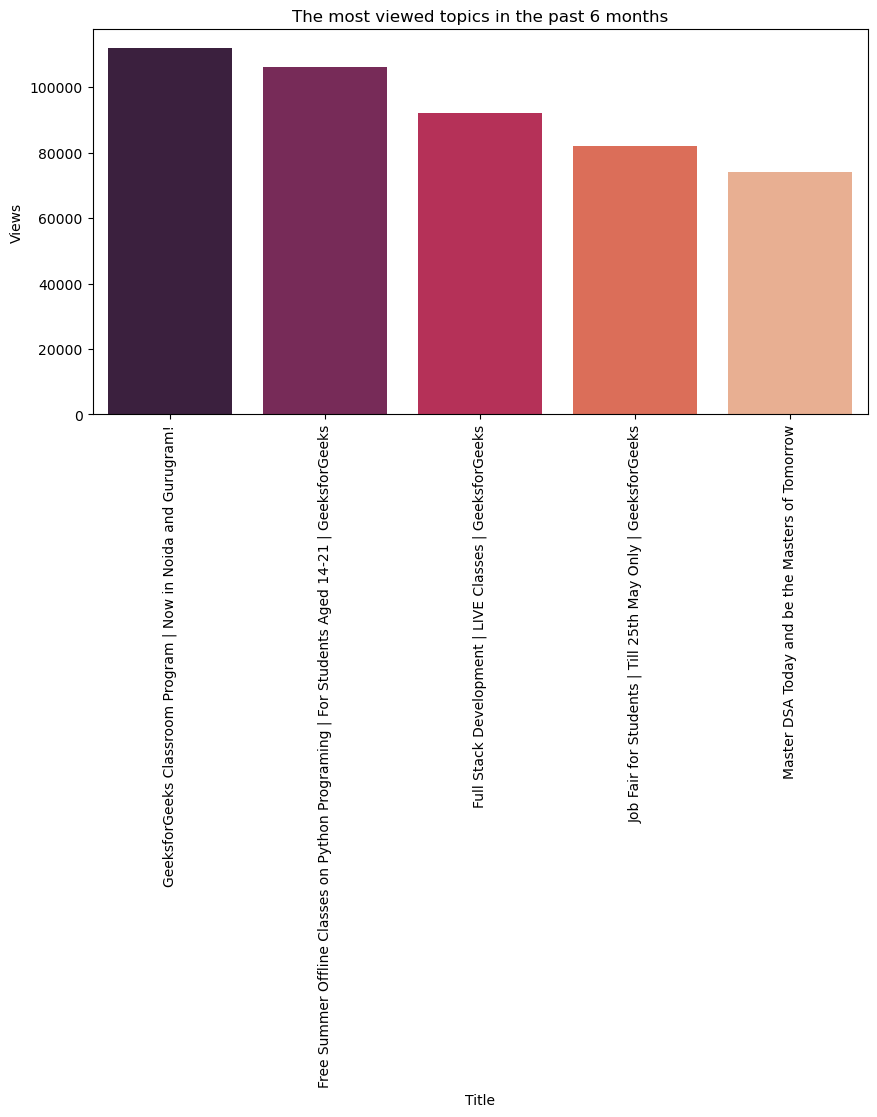

In [169]:
viw = new_table.sort_values(by ='Views', ascending = False)[['Title', 'Views']]
plt.figure(figsize =(10,5))
sns.barplot(data = viw.head(5),x = 'Title',y ='Views',palette = 'rocket')
plt.xticks(rotation = 90)
plt.xlabel("Title")
plt.ylabel("Views")
plt.title("The most viewed topics in the past 6 months")
plt.show()

In [170]:
print("The most viewed topics in the past 6 months")
new_table.sort_values(by ='Views', ascending = False)[['Title', 'Views']].head(1).style.background_gradient()

The most viewed topics in the past 6 months


,Title,Views
29,GeeksforGeeks Classroom Program | Now in Noida and Gurugram!,112000


In [171]:
new_table.head(2)

,Title,Views,Date_Time,Link,LengthOfVideo
0,All Your Queries Answered | DSA to Development...,685,1 day ago,https://www.youtube.com/watch?v=PLdt7UobcoY,3:47
1,10 TIPS and TRICKS to Crack Internships and Pl...,682,6 days ago,https://www.youtube.com/watch?v=PLdt7UobcoY,9:53


Data Preprocessing

In [172]:

  
new2 = []
  
for i in new_table['LengthOfVideo']:
    if(i=='SHORTS' or len(i.split(':'))==1):
        new2.append(i)
    elif(len(i.split(':'))==2):
        i = i.split(':')
        tim = int(i[0])*60 + int(i[1])
        new2.append(tim)
    elif(len(i.split(':'))==3):
        i = i.split(':')
        tim = int(i[0])*3600 + int(i[1])*60 + int(i[2])
        new2.append(tim)
          
new_table['LengthOfVideo'] = new2

C:\Users\DELL\AppData\Local\Temp\ipykernel_5288\74431473.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_table['LengthOfVideo'] = new2


In [173]:
new_table['LengthOfVideo']

0      227
1      593
2       56
3       46
4     2744
      ... 
65     161
66      62
67     238
68      46
69     439
Name: LengthOfVideo, Length: 70, dtype: int64

In [175]:
new_table

,Title,Views,Date_Time,Link,LengthOfVideo
0,All Your Queries Answered | DSA to Development...,685,1 day ago,https://www.youtube.com/watch?v=PLdt7UobcoY,227
1,10 TIPS and TRICKS to Crack Internships and Pl...,682,6 days ago,https://www.youtube.com/watch?v=PLdt7UobcoY,593
2,Complete School Guide for CBSE | Free Resource...,511,7 days ago,https://www.youtube.com/watch?v=PLdt7UobcoY,56
3,Master System Design | GeeksforGeeks,7200,11 days ago,https://www.youtube.com/watch?v=PLdt7UobcoY,46
4,"Unraveling the Geek-a-thon: The What, How, and...",440,11 days ago,https://www.youtube.com/watch?v=PLdt7UobcoY,2744
...,...,...,...,...,...
65,Optimal Way to Get Started with DSA | Geeksfor...,7100,6 months ago,https://www.youtube.com/watch?v=PLdt7UobcoY,161
66,Mistakes to Avoid in Your Next Job Interview |...,1500,6 months ago,https://www.youtube.com/watch?v=PLdt7UobcoY,62
67,Master These Coding Practices For Your Placeme...,5400,6 months ago,https://www.youtube.com/watch?v=PLdt7UobcoY,238
68,Correct Your Mistakes in 1 minute | Data Scien...,1200,6 months ago,https://www.youtube.com/watch?v=PLdt7UobcoY,46


# 4. Name the topics with the highest video length.

In [176]:
new_table.sort_values(by ='LengthOfVideo', ascending = False)[['Title', 'LengthOfVideo']].head(5).style.background_gradient()

,Title,LengthOfVideo
5,Data Analysis Masterclass | Geek-A-Thon | GeeksforGeeks,5361
4,"Unraveling the Geek-a-thon: The What, How, and Why | Geek-A-Thon | GeeksforGeeks",2744
59,"Meet Shikar Goel, CTO of GeeksforGeeks | Know His Journey",2242
56,OpenAI's ChatGPT & GPT 4 | Google's BARD AI | Will AI Replace You?,2145
50,CodeCast Ep. 3 | Learn all About Competitive Programming | @PriyanshAgarwal with Mr. Sandeep Jain,1916


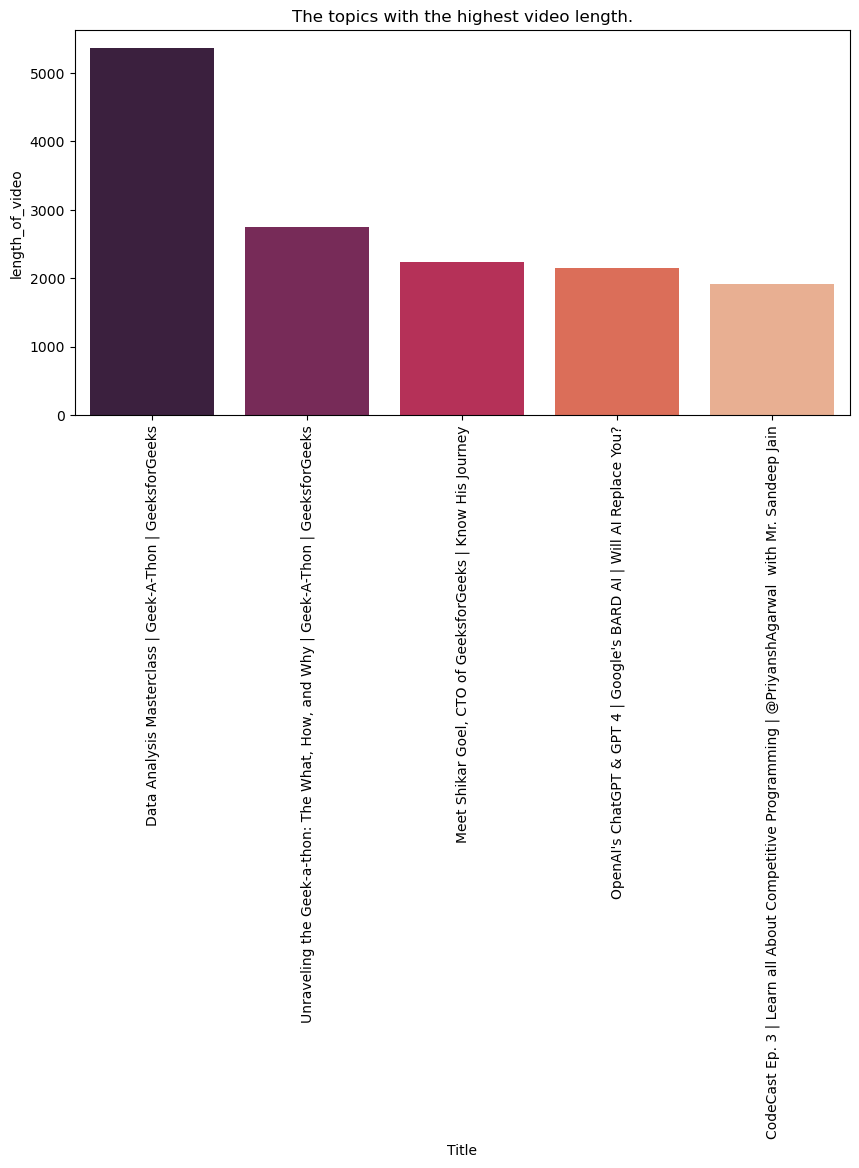

In [177]:
len_of_video = new_table.sort_values(by ='LengthOfVideo', ascending = False)[['Title', 'LengthOfVideo']]
plt.figure(figsize =(10,5))
sns.barplot(data = len_of_video.head(5),x = 'Title',y ='LengthOfVideo',palette = 'rocket')
plt.xticks(rotation = 90)
plt.xlabel("Title")
plt.ylabel('length_of_video')
plt.title('The topics with the highest video length.')
plt.show()

In [178]:
print('the topics with the highest video length')
new_table.sort_values(by ='LengthOfVideo', ascending = False)[['Title', 'LengthOfVideo']].head(5).style.background_gradient()

the topics with the highest video length


,Title,LengthOfVideo
5,Data Analysis Masterclass | Geek-A-Thon | GeeksforGeeks,5361
4,"Unraveling the Geek-a-thon: The What, How, and Why | Geek-A-Thon | GeeksforGeeks",2744
59,"Meet Shikar Goel, CTO of GeeksforGeeks | Know His Journey",2242
56,OpenAI's ChatGPT & GPT 4 | Google's BARD AI | Will AI Replace You?,2145
50,CodeCast Ep. 3 | Learn all About Competitive Programming | @PriyanshAgarwal with Mr. Sandeep Jain,1916


# 5. Make a comparison between the number of views and video length using a Graph.

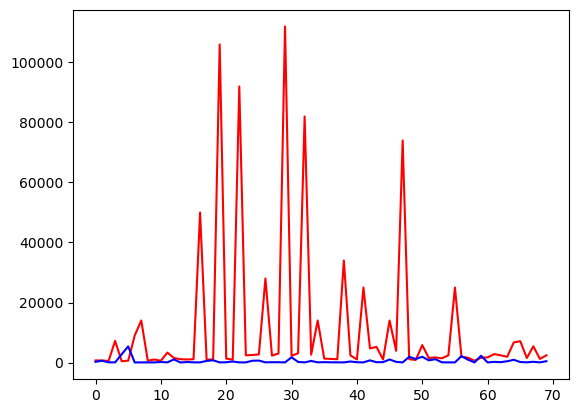

In [179]:
Views = new_table['Views']
Duration = new_table['LengthOfVideo']

plt.plot(Views,color ='red')
plt.plot(Duration,color = 'blue')

plt.show()

Tasks & Questions:
1. Number of videos in the past 6 months from the start date. Must mention the dates in the solution.
2. Create a pandas data frame with columns name as videos title, views, Length of videos, and videos link
3. Name the most viewed topics in the past 6 months.
4. Name the topics with the highest video length.
5. Make a comparison between the number of views and video length using a Graph.

In [ ]:
time[1].strip().split(' ')[1] == 'seconds'
time[1].strip().split(' ')[1] == 'minutes'